# Kmeans
* 중심 포인트(CP1랜덤)로부터 K(임의지정)개를 그룹화
* 그 그룹화된 반경 내에서 중심(CP1)과 각 포인트(K-1) 간의 거리(유클리드)의 평균
* 평균 거리값이 가장 작은 포인트가 중심(CP2)으로 재설정
* 중심(CP1)은 일반 포인트가 돼서 가장 가까운 CP를 찾고 반경 내로 재그룹이 형성됨
* 포인트의 변경이 없을 때까지 무한 반복

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
cols = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
df = pd.DataFrame(iris.data, columns=cols)
df["target"]=iris.target
df

,Sepal length,Sepal width,Petal length,Petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df_2cols = df [["Sepal length", "Sepal width"]]

model = KMeans(n_clusters=3)
model.fit(df_2cols)
ncluster = model.predict(df_2cols)

df["ncluster"] = ncluster

df.head() #ncluster가 target의 의미가 아니라 군집에서 0,1,2 중 어디에 묶였는지 표현한 것.

,Sepal length,Sepal width,Petal length,Petal width,target,ncluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [4]:
model.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

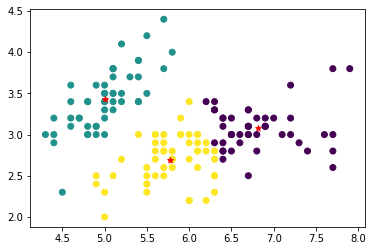

In [5]:
centers = pd.DataFrame(model.cluster_centers_, columns=["Sepal length", "Sepal width"])
center_x = centers["Sepal length"]
center_y = centers["Sepal width"]

plt.scatter(df["Sepal length"], df["Sepal width"], c=df["ncluster"])
plt.scatter(center_x, center_y, marker="*", c="r")
plt.show()

In [6]:
def myscore(model, x, ncluster):
    c_coef = silhouette_samples(x, ncluster)
    print(c_coef[:5])
    df["c_coef"]=c_coef

    score = silhouette_score(x, ncluster)
    print(f"점수:{score:.4f}")
    
    print(f"응집도:{model.inertia_:.4f}")

In [7]:
myscore(model, df_2cols, df["ncluster"]) #응집도는 높을수록 best(유관된 것들로만 묶여있다)

[0.59821502 0.40612542 0.56116222 0.50873385 0.62315302]
점수:0.4451
응집도:37.0507


In [8]:
#스케일링 후 얼마나 응집도에 영향을 미치는 지 확인
scaler = StandardScaler()

scaler_val = scaler.fit_transform(df[["Sepal length", "Sepal width"]])
df[["Sepal_length_scale", "Sepal_width_scale"]] = scaler_val

df.head()

,Sepal length,Sepal width,Petal length,Petal width,target,ncluster,c_coef,Sepal_length_scale,Sepal_width_scale
0,5.1,3.5,1.4,0.2,0,1,0.598215,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,0,1,0.406125,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,0,1,0.561162,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,0,1,0.508734,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,0,1,0.623153,-1.021849,1.249201


In [9]:
df_2cols = df [["Sepal_length_scale", "Sepal_width_scale"]]

model = KMeans(n_clusters=3)
model.fit(df_2cols)
ncluster = model.predict(df_2cols)

df["ncluster_scaler"] = ncluster

df.head() #ncluster가 target의 의미가 아니라 군집에서 0,1,2 중 어디에 묶였는지 표현한 것.

,Sepal length,Sepal width,Petal length,Petal width,target,ncluster,c_coef,Sepal_length_scale,Sepal_width_scale,ncluster_scaler
0,5.1,3.5,1.4,0.2,0,1,0.598215,-0.900681,1.019004,1
1,4.9,3.0,1.4,0.2,0,1,0.406125,-1.143017,-0.131979,1
2,4.7,3.2,1.3,0.2,0,1,0.561162,-1.385353,0.328414,1
3,4.6,3.1,1.5,0.2,0,1,0.508734,-1.506521,0.098217,1
4,5.0,3.6,1.4,0.2,0,1,0.623153,-1.021849,1.249201,1


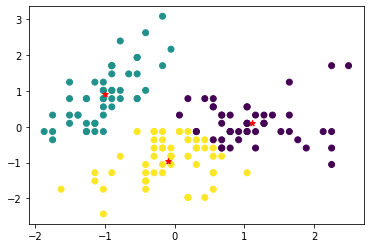

In [10]:
centers = pd.DataFrame(model.cluster_centers_, columns=["Sepal_length_scale", "Sepal_width_scale"])
center_x = centers["Sepal_length_scale"]
center_y = centers["Sepal_width_scale"]

plt.scatter(df["Sepal_length_scale"], df["Sepal_width_scale"], c=df["ncluster_scaler"])
plt.scatter(center_x, center_y, marker="*", c="r")
plt.show()

In [11]:
myscore(model, df_2cols, df["ncluster_scaler"]) #응집도는 100일 때 best(유관된 것들로만 묶여있다)
# 점수:0.4451 >> 0.4343
# 응집도:37.0507 >> 102.6169

[0.64454259 0.20026949 0.50849325 0.41000468 0.65368182]
점수:0.4343
응집도:102.6169


### 최적의 군집 개수는 몇 개?

2개로 군집화=============
[0.64958336 0.37216381 0.57234994 0.5063326  0.65414918]
점수:0.4479
응집도:166.9517


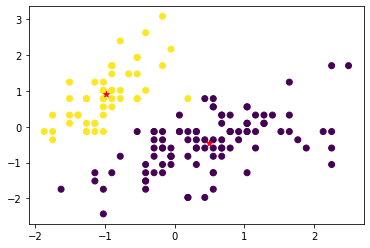

3개로 군집화=============
[0.63870773 0.20166077 0.50275692 0.40644779 0.64752337]
점수:0.4372
응집도:102.6177


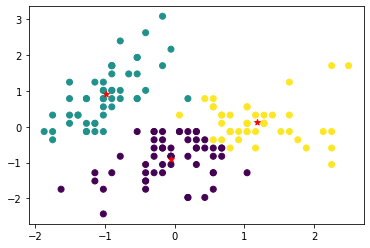

4개로 군집화=============
[0.31352265 0.46322942 0.66317299 0.60712803 0.02179895]
점수:0.4183
응집도:79.7611


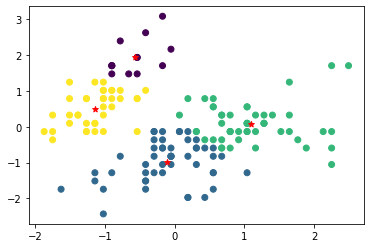

5개로 군집화=============
[0.32757644 0.4407031  0.66738234 0.60350322 0.04172398]
점수:0.4010
응집도:61.8092


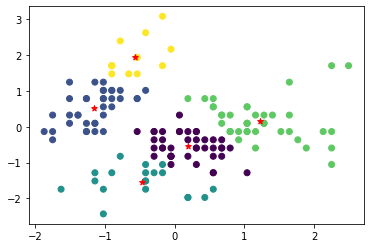

6개로 군집화=============
[0.32757644 0.44204536 0.66857483 0.60484923 0.04172398]
점수:0.3953
응집도:52.1747


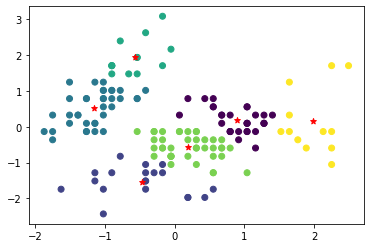

In [23]:
NS = [2,3,4,5,6]
df_2col = df [["Sepal_length_scale", "Sepal_width_scale"]]

for n in NS:
    model = KMeans(n_clusters=n)
    model.fit(df_2col)
    ncluster = model.predict(df_2col)
    print(f"{n}개로 군집화=============")
    myscore(model, df_2col, ncluster)
    
    centers = pd.DataFrame(model.cluster_centers_, columns=["Sepal_length_scale", "Sepal_width_scale"])
    center_x = centers["Sepal_length_scale"]
    center_y = centers["Sepal_width_scale"]

    plt.scatter(df["Sepal_length_scale"], df["Sepal_width_scale"], c=ncluster)
    plt.scatter(center_x, center_y, marker="*", c="r")
    plt.show()

### 검증

In [26]:
ctab = pd.crosstab(df["target"], df["ncluster_scaler"])
ctab

ncluster_scaler,0,1,2
target,,,
0,0,49,1
1,15,0,35
2,34,0,16


In [28]:
model = KMeans(n_clusters=2)
model.fit(df_2col)
ncluster = model.predict(df_2col)
df["ncluster_scaler_2"]=ncluster

In [29]:
ctab = pd.crosstab(df["target"], df["ncluster_scaler_2"])
ctab

ncluster_scaler_2,0,1
target,,
0,49,1
1,1,49
2,0,50


# 계층적 군집

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

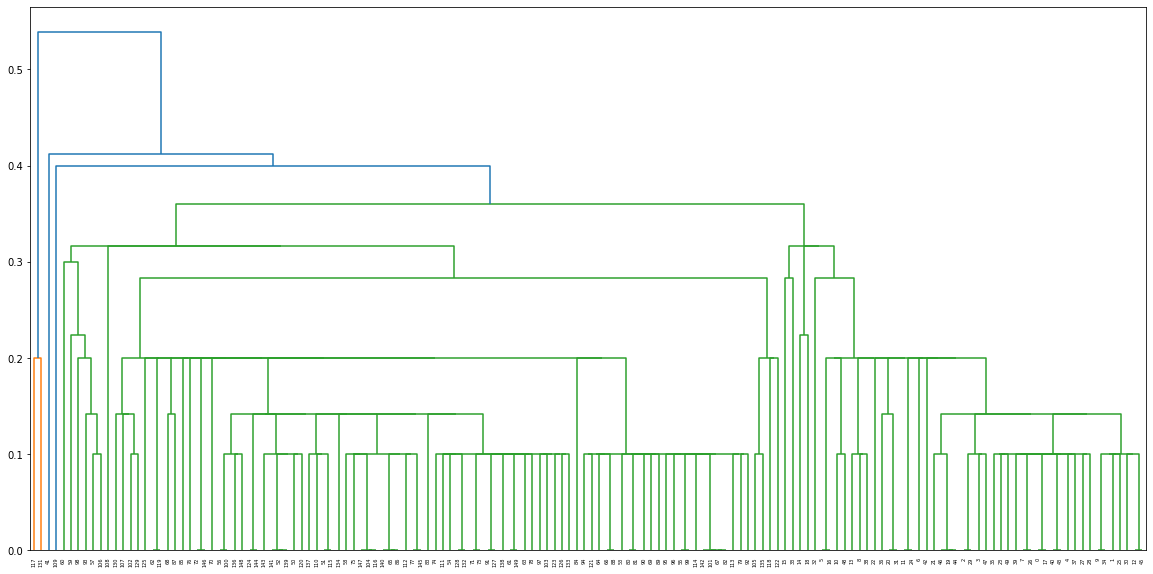

In [32]:
plt.figure(figsize=(20,10))
#y, method='single', metric='euclidean',
matrix = linkage(df [["Sepal length", "Sepal width"]], method='single', metric='euclidean')
dendrogram(matrix)
plt.show()                 